 ## Check Data

In [1]:
import obspy

from obspy.clients.filesystem.sds import Client


### configurations

In [2]:
config = {}

config['tbeg'] = obspy.UTCDateTime("2023-03-16 00:50")
config['tend'] = obspy.UTCDateTime("2023-03-16 03:30")

config['client'] = Client("/import/freenas-ffb-01-data/ModalAnalysis/data/SDS")  

config['seed'] = "XX.RY08..HH*"

config['inventories'] = "/home/brotzer/Desktop/test_RY/xml/"

### load data

In [5]:
def __get_data(config, seed="XX.RY08..HH*"):
    
    net, sta, loc, cha = seed.split(".")

    st = config['client'].get_waveforms(network=net, station=sta, location=loc, channel=cha, 
                                    starttime=config['tbeg'], endtime=config['tend'])

    inv = obspy.read_inventory(config['inventories']+f"{sta}.xml")
    
    return st, inv

In [6]:
st0, inv = __get_data(config, seed=config['seed'])

In [7]:
st = st0.copy()

st = st.remove_response(inventory=inv, output="VEL", water_level=60, plot=False) 

st = st.detrend('demean')

st = st.taper(0.1)

st = st.filter('bandpass', freqmin=0.01, freqmax=.3, corners=4, zerophase=True)

/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/imaging/util.py:275: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
/home/brotzer/anaconda3/lib/python3.7/site-packages/obspy/imaging/waveform.py:820: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


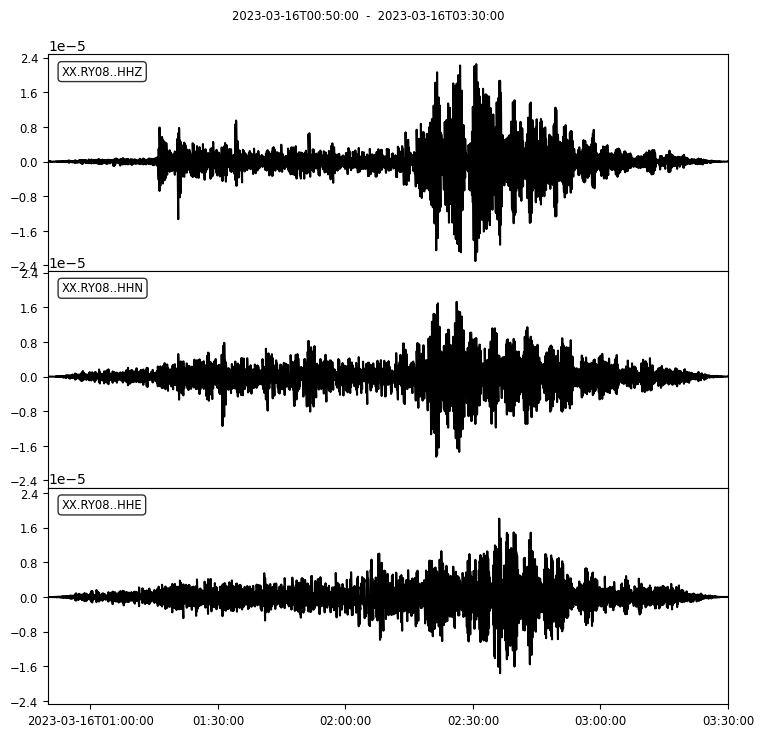

In [8]:
st.plot();